# Data Mining Assignment

<iframe width="560" height="315"
src="https://youtube.com/embed/al7Ol7cm7bU"
frameborder="0" allowfullscreen></iframe>

In this assignment, I will aim to solve the problem of finding out whether someone is at risk of having a stroke based on certain variables, like smoking. 

The dataset I have found contains over 5000 different people, that have either had a stroke or not, and many variables about their life, such as age, BMI and smoking. While this dataset is large, it is slightly unblanced as it contains only 250 people that have had a stroke in the 5000. 

In [ ]:
import pandas as pd

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


First off, I cleaned the data, to get rid of the ID column, and to get rid of any rows that have empty values. This is vital to ensure reliable results. I then targeted the variable I am trying to predict, which is the stroke variable. It was then important to encode certain variables in order to run the model, as the model cannot read letters. 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

df.dropna(inplace=True)
df.drop(columns=["id"], inplace=True)
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
X = df.drop(columns=["stroke"])
y = df["stroke"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

I then started on making the KNN prediction model, I printed it as a classification report, but to make it easier to read, I made a confusion matrix

KNN Performance:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



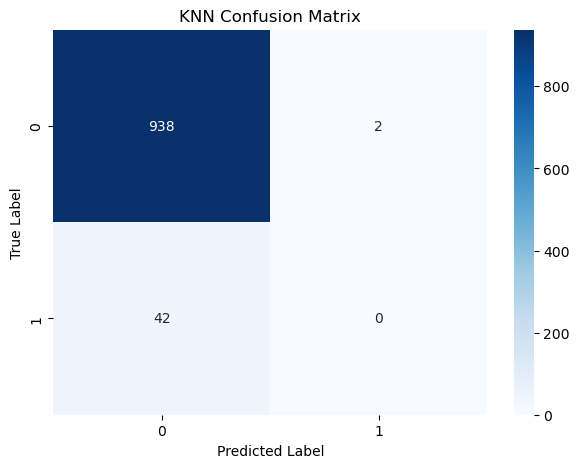

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Performance:")
print(classification_report(y_test, y_pred_knn))
fig, axes = plt.subplots(1, 1, figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap="Blues")
axes.set_title("KNN Confusion Matrix")
axes.set_xlabel("Predicted Label")
axes.set_ylabel("True Label")
plt.show();

As can be seen from the results above, the model correctly predicts someone to not have a stroke at a 96% accuracy. I then moved onto the Naive Bayes prediction

Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       940
           1       0.15      0.36      0.21        42

    accuracy                           0.88       982
   macro avg       0.56      0.63      0.57       982
weighted avg       0.93      0.88      0.91       982



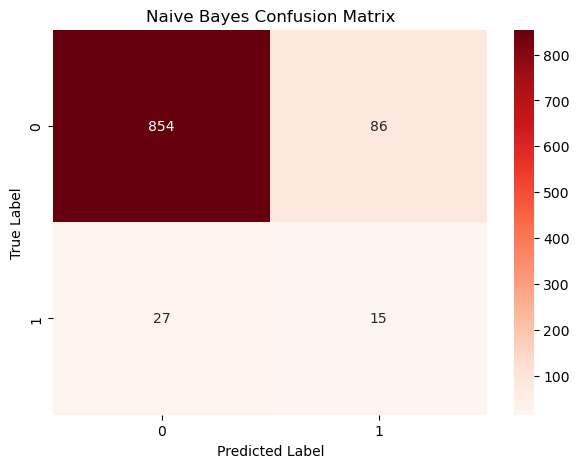

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))
fig, axes = plt.subplots(1, 1, figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap="Reds")
axes.set_title("Naive Bayes Confusion Matrix")
axes.set_xlabel("Predicted Label")
axes.set_ylabel("True Label")
plt.show();

The above results show that the Naive Bayes is slightly better at predicting that someone will not have a stroke, but inaccuracte to predict if someone will have a stroke, this therefore brings the accuracy down to 88%. 

However, it can be seen in both of these models, that they only really predict for someone not having a stroke, and this is because the dataset is unbalanced, as there is a lot more instances where someone doesn't have a stroke. In order to counter this problem, I had to do some research and eventually decided to employ the SMOTE technique. 

KNN Performance:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       940
           1       0.86      0.99      0.92       940

    accuracy                           0.92      1880
   macro avg       0.93      0.92      0.92      1880
weighted avg       0.93      0.92      0.92      1880



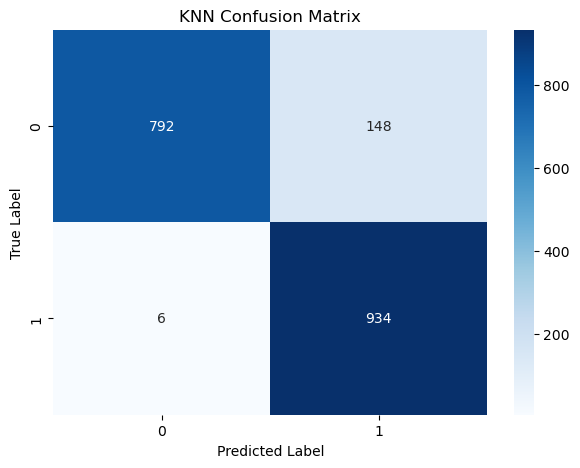

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Performance:")
print(classification_report(y_test, y_pred_knn))

fig, axes = plt.subplots(1, 1, figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap="Blues")
axes.set_title("KNN Confusion Matrix")
axes.set_xlabel("Predicted Label")
axes.set_ylabel("True Label")
plt.show;

Employing this SMOTE technique massively improved the results. Although the overall accuracy of the KNN model has dropped slightly, the precision for predicting someone not having a stroke is 99%, and for predicting someone having a stroke is 86%, which is a massive increase from the previous model.

Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       940
           1       0.77      0.80      0.79       940

    accuracy                           0.78      1880
   macro avg       0.78      0.78      0.78      1880
weighted avg       0.78      0.78      0.78      1880



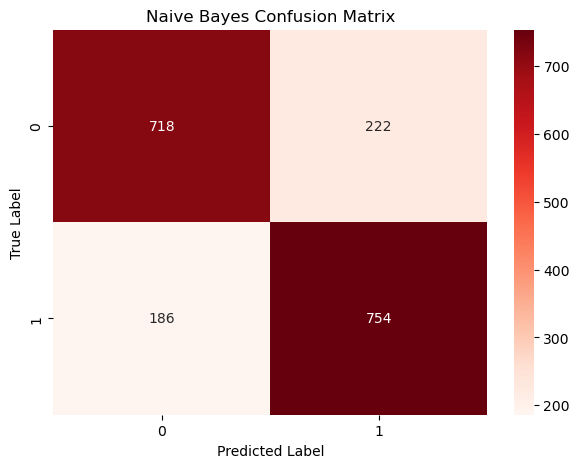

In [ ]:
class_priors = [0.5, 0.5]
nb = GaussianNB(priors=class_priors)
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))
fig, axes = plt.subplots(1, 1, figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap="Reds")
axes.set_title("Naive Bayes Confusion Matrix")
axes.set_xlabel("Predicted Label")
axes.set_ylabel("True Label")
plt.show();

The Naive Bayes model performed underwhelmingly after balancing the data. While it is now better at predicitng for both getting a stroke and not having a stroke, the accuracy is very low at only 78%

In a business setting, this model would be employed to assess whether or not people will likely have a stroke in their lifetime, depending on variables such as smoking, BMI and presence of other diseases.

To conclude, the dataset was very interesting to analyse, and I believe that predicting whether or not people will have a stroke or not, can be life changing. While the models performed decently, the dataset was unbalanced which caused some problems. After balancing the data, the models became better at predicting both having a stroke and not, but a dataset that wasn't so imbalanced would make for much more accurate results. 